In [10]:
import uproot # for data loading
import awkward as ak # for data manipulation
import hist # for histogram filling (and some plotting)
import numpy as np
import math

import matplotlib as mpl # for plotting
import matplotlib.pyplot as plt # common shorthand
import mplhep # style of plots
%matplotlib inline
mpl.style.use(mplhep.style.ROOT) # set the plot style

In [11]:
with uproot.open('/home/ram2aq/ldmx/data/eat_vis_signal/category_signal_Nevents_1000_MaxTries_10k_mAMeV_0005_epsilon_0.01_minApE_4000_minPrimEatEcal_7000_run_4000.root') as f:
    f['LDMX_Events'].show(name_width=100)
    #events = f['LDMX_Events'].arrays()
    
#events

name                                                                                                 | typename                 | interpretation                
-----------------------------------------------------------------------------------------------------+--------------------------+-------------------------------
EventHeader                                                                                          | ldmx::EventHeader        | AsGroup(<TBranchElement 'Ev...
EventHeader/eventNumber_                                                                             | int32_t                  | AsDtype('>i4')
EventHeader/run_                                                                                     | int32_t                  | AsDtype('>i4')
EventHeader/timestamp_                                                                               | TTimeStamp               | AsGroup(<TBranchElement 'ti...
EventHeader/timestamp_/timestamp_.fSec                            

In [3]:
[len(event["SimParticles_eat_vis.first"]) for event in events]

[14, 12, 14, 20, 18, 21, 12, 10, 89, 12]

In [4]:
    for event in events:
        for i_part, pdgID in enumerate(event["SimParticles_eat_vis.second.pdgID_"]):
            if pdgID == 622:
                print(i_part, event["SimParticles_eat_vis.second.daughters_"][i_part], event["SimParticles_eat_vis.second.x_"][i_part], 
                      event["SimParticles_eat_vis.second.y_"][i_part], event["SimParticles_eat_vis.second.z_"][i_part], 
                      event["SimParticles_eat_vis.second.endX_"][i_part], event["SimParticles_eat_vis.second.endY_"][i_part],
                      event["SimParticles_eat_vis.second.endZ_"][i_part])

11 [] 0.9859722271259144 -4.6692752234296595 290.8474952517885 -74.13162537455662 21.313567955768868 6000.0
10 [] 2.341620736820302 -4.52914914447362 274.4653749994037 -47.23386826858603 -15.564009234698542 6000.0
12 [] 8.116908614775792 22.477919318074647 246.40453336398681 -33.76211718879388 19.80311798525785 6000.0
14 [] 3.3775049586167323 -16.050825607996675 265.3653279321767 -60.46058919107146 -20.60604596199227 6000.0
11 [] 5.710007940384597 -27.883510869223098 265.05270247659297 -48.64084536117402 -22.396167850870725 6000.0
9 [] -1.3201448897514763 -32.20601806988017 256.48958806612166 -45.24582970803085 -38.79491148149528 6000.0
10 [] 3.5173235321312615 -26.52842335287741 275.1330399948289 -14.906038826014306 -18.29307247202343 6000.0
8 [] 1.078961952151983 -33.39065617758455 264.79477411200435 -43.63673570435584 -16.966658158896955 6000.0
18 [] -10.955338702374162 -12.027024408249622 264.76516165829395 -63.090374292716824 -14.81164401390285 6000.0
10 [] 1.9361283589449878 16.8

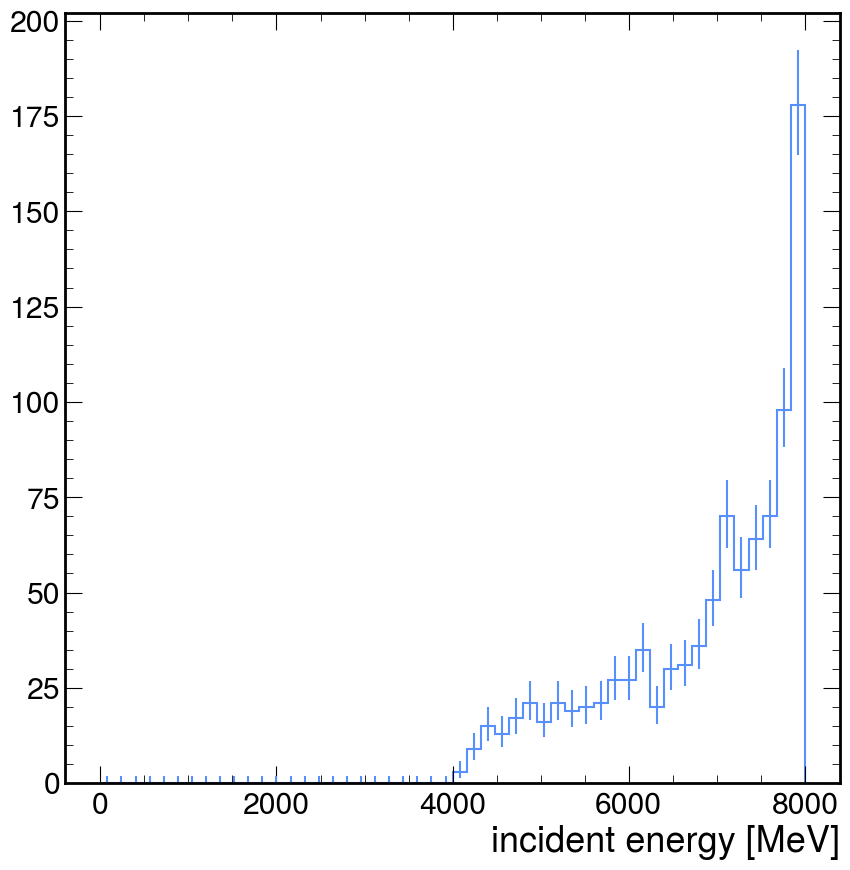

In [33]:
c = 2.99792E11 # mm/s

with uproot.open('/home/ram2aq/ldmx/ldmx-sim-visdecay/ldmx-sw/test_geantdecay.root') as f:
    events_geantdecays = f['LDMX_Events'].arrays()
        
    h_decaydist_geant = hist.Hist.new.Reg(50, 0, 6000, name="dist", label="distance traveled [mm]").Int64()
    h_incident_energy = hist.Hist.new.Reg(50, 0, 8000, name="incident_e", label="incident energy [MeV]").Int64()
    for event in events_geantdecays:
    
        part_id_to_index = {}

        for i_part, part_id in enumerate(event["SimParticles_eat_vis.first"]):
            part_id_to_index[part_id] = i_part
    
        for i_part, pdgID in enumerate(event["SimParticles_eat_vis.second.pdgID_"]):
            if pdgID == 622:
                #print(i_part, event["SimParticles_eat_vis.second.daughters_"][i_part], event["SimParticles_eat_vis.second.x_"][i_part], 
                #      event["SimParticles_eat_vis.second.y_"][i_part], event["SimParticles_eat_vis.second.z_"][i_part], 
                #      event["SimParticles_eat_vis.second.endX_"][i_part], event["SimParticles_eat_vis.second.endY_"][i_part],
                #      event["SimParticles_eat_vis.second.endZ_"][i_part])
                x = event["SimParticles_eat_vis.second.x_"][i_part]
                y = event["SimParticles_eat_vis.second.y_"][i_part]
                z = event["SimParticles_eat_vis.second.z_"][i_part]
                endX = event["SimParticles_eat_vis.second.endX_"][i_part]
                endY = event["SimParticles_eat_vis.second.endY_"][i_part]
                endZ = event["SimParticles_eat_vis.second.endZ_"][i_part]
                dist_traveled = math.dist([x,y,z],
                                          [endX, endY, endZ])
                #print(dist_traveled)
                h_decaydist_geant.fill(dist_traveled)
                
                #px = event["SimParticles_eat_vis.second.px_"][i_part]
                #py = event["SimParticles_eat_vis.second.py_"][i_part]
                #pz = event["SimParticles_eat_vis.second.pz_"][i_part]
                #energy = event["SimParticles_eat_vis.second.energy_"][i_part]
                #v2 = (px * px) + (py * py) + (pz * pz)
                #t2 = energy * energy
                #gamma = 1 / math.sqrt(1 - v2 / t2)
                
                if event["SimParticles_eat_vis.second.parents_"][i_part][0] in part_id_to_index:
                    parent_i = part_id_to_index[event["SimParticles_eat_vis.second.parents_"][i_part][0]]
                    #parent_endX = event["SimParticles_eat_vis.second.endX_"][parent_i]
                    #parent_endY = event["SimParticles_eat_vis.second.endY_"][parent_i]
                    #parent_endZ = event["SimParticles_eat_vis.second.endZ_"][parent_i]
                    #print(x, parent_endX)
                    
                    parent_endpx = event["SimParticles_eat_vis.second.endpx_"][parent_i]
                    parent_endpy = event["SimParticles_eat_vis.second.endpy_"][parent_i]
                    parent_endpz = event["SimParticles_eat_vis.second.endpz_"][parent_i]
                    parent_endp2 = (parent_endpx * parent_endpx) + (parent_endpy * parent_endpy) + (parent_endpz * parent_endpz)
                    parent_endE = math.sqrt(parent_endp2 + event["SimParticles_eat_vis.second.mass_"][parent_i] * event["SimParticles_eat_vis.second.mass_"][parent_i])
                    h_incident_energy.fill(parent_endE)
                    
                #else:
                    #print("parent not in event record")

    h_decaydist_geant.plot()
    #h_incident_energy.plot()   

parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
parent not in event record
p

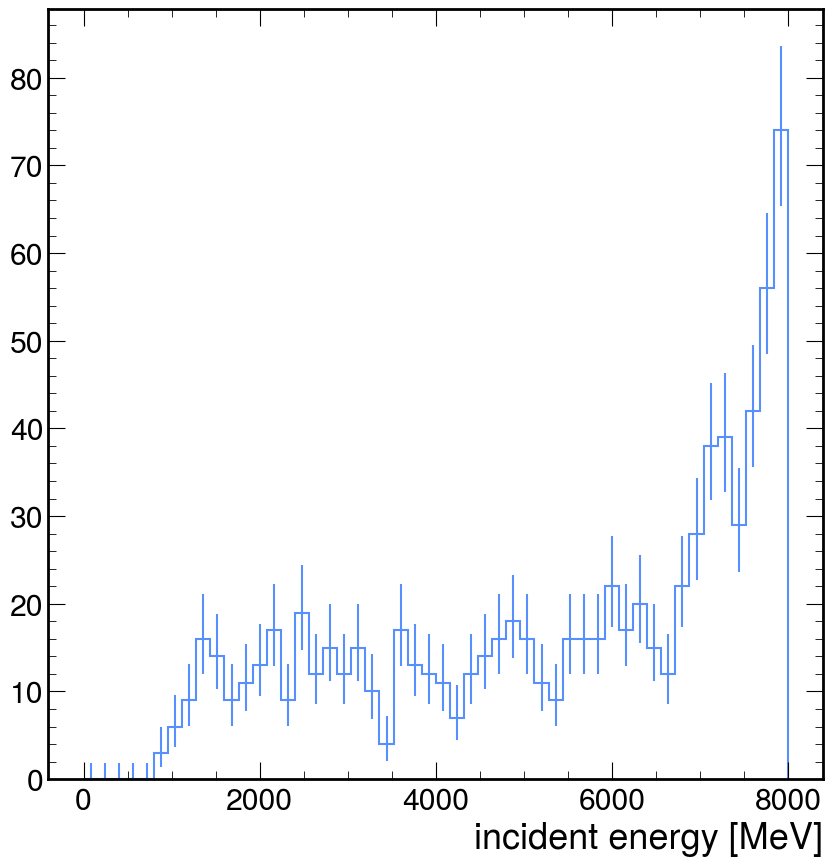

In [55]:
with uproot.open('/home/ram2aq/ldmx/ldmx-sim-visdecay/ldmx-sw/test_flatdecay_mA_0.1.root') as f:
    events_geantdecays = f['LDMX_Events'].arrays()
        
    h_decaydist_geant = hist.Hist.new.Reg(50, 0, 6000, name="dist", label="distance traveled [mm]").Int64()
    h_incident_energy = hist.Hist.new.Reg(50, 0, 8000, name="incident_e", label="incident energy [MeV]").Int64()
    h_ndaughters = hist.Hist.new.Reg(10, 0, 10, name="ndaughters", label="number of daughters").Int64()
    h_daughter_invariant_mass = hist.Hist.new.Reg(50, 0, 110, name="daughter_invariant_mass", label="invariant mass of daughters [MeV]").Int64()
    for event in events_geantdecays:
    
        part_id_to_index = {}

        for i_part, part_id in enumerate(event["SimParticles_eat_vis.first"]):
            part_id_to_index[part_id] = i_part
    
        for i_part, pdgID in enumerate(event["SimParticles_eat_vis.second.pdgID_"]):
            if pdgID == 622:
                #print(i_part, event["SimParticles_eat_vis.second.daughters_"][i_part], event["SimParticles_eat_vis.second.x_"][i_part], 
                #      event["SimParticles_eat_vis.second.y_"][i_part], event["SimParticles_eat_vis.second.z_"][i_part], 
                #      event["SimParticles_eat_vis.second.endX_"][i_part], event["SimParticles_eat_vis.second.endY_"][i_part],
                #      event["SimParticles_eat_vis.second.endZ_"][i_part])
                x = event["SimParticles_eat_vis.second.x_"][i_part]
                y = event["SimParticles_eat_vis.second.y_"][i_part]
                z = event["SimParticles_eat_vis.second.z_"][i_part]
                endX = event["SimParticles_eat_vis.second.endX_"][i_part]
                endY = event["SimParticles_eat_vis.second.endY_"][i_part]
                endZ = event["SimParticles_eat_vis.second.endZ_"][i_part]
                dist_traveled = math.dist([x,y,z],
                                          [endX, endY, endZ])
                #print(dist_traveled)
                h_decaydist_geant.fill(dist_traveled)
                
                #px = event["SimParticles_eat_vis.second.px_"][i_part]
                #py = event["SimParticles_eat_vis.second.py_"][i_part]
                #pz = event["SimParticles_eat_vis.second.pz_"][i_part]
                #energy = event["SimParticles_eat_vis.second.energy_"][i_part]
                #v2 = (px * px) + (py * py) + (pz * pz)
                #t2 = energy * energy
                #gamma = 1 / math.sqrt(1 - v2 / t2)
                
                if event["SimParticles_eat_vis.second.parents_"][i_part][0] in part_id_to_index:
                    parent_i = part_id_to_index[event["SimParticles_eat_vis.second.parents_"][i_part][0]]
                    #parent_endX = event["SimParticles_eat_vis.second.endX_"][parent_i]
                    #parent_endY = event["SimParticles_eat_vis.second.endY_"][parent_i]
                    #parent_endZ = event["SimParticles_eat_vis.second.endZ_"][parent_i]
                    #print(x, parent_endX)
                    
                    parent_endpx = event["SimParticles_eat_vis.second.endpx_"][parent_i]
                    parent_endpy = event["SimParticles_eat_vis.second.endpy_"][parent_i]
                    parent_endpz = event["SimParticles_eat_vis.second.endpz_"][parent_i]
                    parent_endp2 = (parent_endpx * parent_endpx) + (parent_endpy * parent_endpy) + (parent_endpz * parent_endpz)
                    parent_endE = math.sqrt(parent_endp2 + event["SimParticles_eat_vis.second.mass_"][parent_i] * event["SimParticles_eat_vis.second.mass_"][parent_i])
                    #print(parent_endE)
                    h_incident_energy.fill(parent_endE)
                    
                else:
                    print("parent not in event record")
                    
                ndaughters = len(event["SimParticles_eat_vis.second.daughters_"][i_part])
                h_ndaughters.fill(ndaughters)
                daughters_total_E = 0.0
                daughters_total_px = 0.0
                daughters_total_py = 0.0
                daughters_total_pz = 0.0
                for daughter_id in event["SimParticles_eat_vis.second.daughters_"][i_part]:
                    if daughter_id in part_id_to_index:
                        daughter_i = part_id_to_index[daughter_id]
                        daughters_total_E += event["SimParticles_eat_vis.second.energy_"][daughter_i]
                        daughters_total_px += event["SimParticles_eat_vis.second.px_"][daughter_i]
                        daughters_total_py += event["SimParticles_eat_vis.second.py_"][daughter_i]
                        daughters_total_pz += event["SimParticles_eat_vis.second.pz_"][daughter_i]
                    else:
                        print("daughter not in event record", part_id_to_index)
                h_daughter_invariant_mass.fill(math.sqrt(daughters_total_E * daughters_total_E - ((daughters_total_px * daughters_total_px) + (daughters_total_py * daughters_total_py) + (daughters_total_pz * daughters_total_pz))))

    h_incident_energy.plot()